# Atençao
## Sem tratamento Prévio!

Para fins didáticos, a primeira versão do estudo foi feita sem pré-processamento, para comparar com versão posterior utilizando pipeline com pré-processamento, PCA e K-Means.

Assim, a versão deste notebook não deve ser considerada para análises mais profundas.

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import warnings
import os
import sys

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore"

In [3]:
import pandas as pd
DADOS  = "../dados/Mall_Customers_no_CustomerID.csv"

df = pd.read_csv(DADOS)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


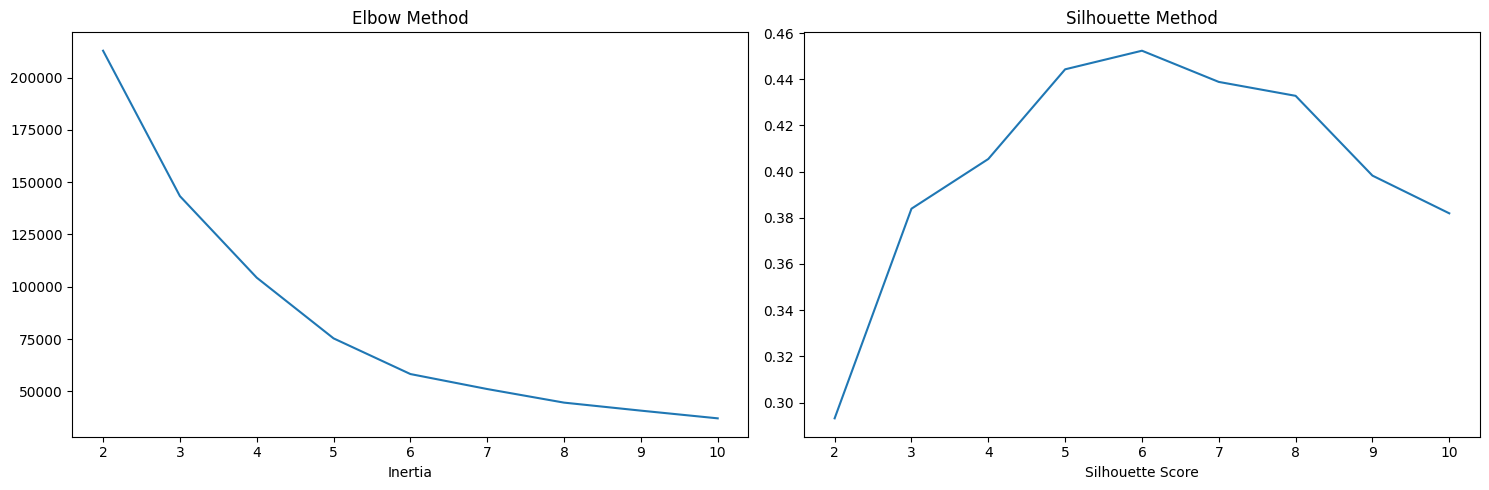

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5), tight_layout=True)

elbow = {}
silhouette = []

RANDOM_STATE = 42
k_range = range(2,11)

X = df.drop("Gender", axis=1)

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init=10)
    kmeans.fit(X)
    elbow[i] = kmeans.inertia_

    labels = kmeans.labels_
    silhouette.append(silhouette_score(X,labels))

sns.lineplot(x=list(elbow.keys()), y=list(elbow.values()), ax=axs[0])
axs[0].set_xlabel("K")
axs[0].set_xlabel("Inertia")
axs[0].set_title("Elbow Method")

sns.lineplot(x=list(k_range), y=silhouette, ax=axs[1])
axs[1].set_xlabel("K")
axs[1].set_xlabel("Silhouette Score")
axs[1].set_title("Silhouette Method")

plt.show()

In [6]:
kmeans = KMeans(n_clusters=6, random_state=RANDOM_STATE, n_init=10)
kmeans.fit(X)
kmeans.labels_

array([5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2,
       5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 0, 2, 0, 3,
       5, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [10]:
import joblib

joblib.dump(kmeans,"../modelos/kmeans.pkl")

['../modelos/kmeans.pkl']

In [11]:
df_clustered = df.copy()
df_clustered["cluster"] = kmeans.labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


In [12]:
df_clustered.to_csv("../dados/Mall_Customer_no_CustomerID_clustered.csv",index=False)

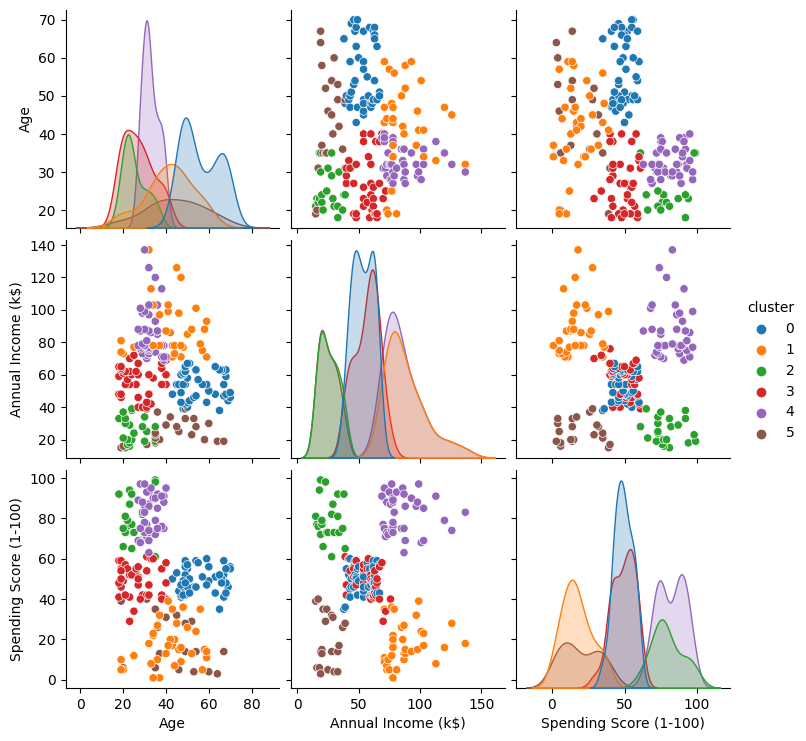

In [15]:
sns.pairplot(df_clustered,diag_kind="kde",hue="cluster", palette="tab10");

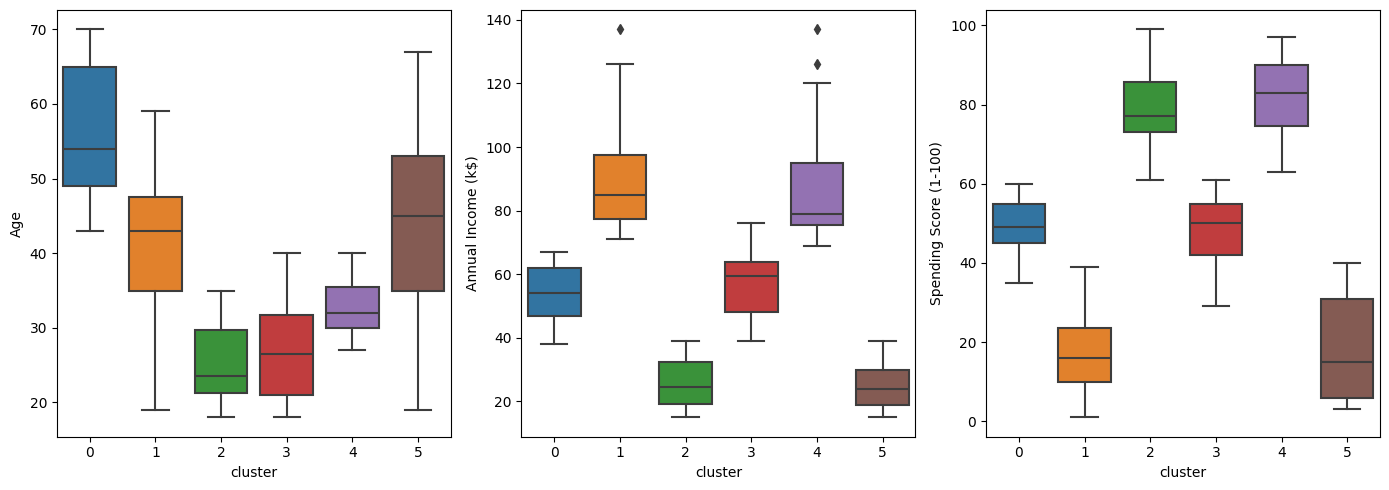

In [17]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(14,5),tight_layout=True)

for ax, col in zip(axs, df_clustered.select_dtypes("number")):
    sns.boxplot(data=df_clustered, x="cluster", y=col ,ax=ax)

plt.show()